# Fitting A Gaussian
I want to see if I can fit a gaussian to our variables to tell which one looks like a cyclone to a degree of similarity

First I will see if I can take a frame, define a gaussian, then sample from that gaussian and create something that looks like the input data

I will iterate through the frames of the input data, and try to fit a gaussian. I will calculate the mean by using my clustering function, which returns a sort of weighted mean, then I will calculate the sample covariance. 

I will try this with and without a threshold

In [43]:
import netCDF4 as nc
from rich import print
import pandas as pd
from scipy import stats
import numpy as np

import imageio
import os
import matplotlib.pyplot as plt
from library import mag_m_step

In [ ]:
PATH = "../data/1991TS"
# WIND SPEED OF GUST
FG = "fg.T1Hmax.UMRA2T.19910428_19910501.BOB01.4p4km.nc"
fg = nc.Dataset(f"{PATH}/{FG}")

# COLUMNNS

latitude = fg.variables["latitude"][:]
longitude = fg.variables["longitude"][:]
wind_speed = fg.variables["wind_speed_of_gust"][:][0]
wind_speed_frame = wind_speed[0][:,:790]



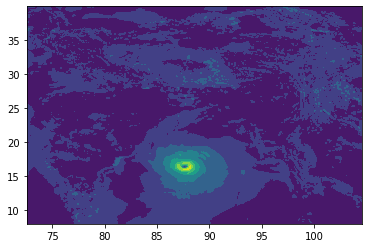

In [45]:
plt.contourf(longitude[:790], latitude, wind_speed_frame)
plt.show()

In [46]:
mean = mag_m_step(wind_speed_frame, longitude, latitude)
print(mean)

[87.97346802 17.63823021]

In [25]:
cov = np.cov([np.asarray(longitude[:790]), np.asarray(latitude)], wind_speed_frame)
print(cov.shape)

(792, 792)

In [21]:
wind_speed_frame.shape

(790, 790)

In [26]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components=2)

wind_pca = pca.fit(wind_speed_frame)

wind_pca.explained_variance_
wind_pca.explained_variance_ratio_

array([13348.995  ,   996.06726], dtype=float32)

In [37]:
wind_fit = pca.fit_transform(wind_speed_frame).T

wind_fit.shape

(2, 790)

In [39]:
pca.fit(scaled_df)
pca_df = pca.transform(scaled_df)
print("The varience encoded by this PCA projection is:")
print(pca.explained_variance_)
# Plot
scatter = ax1.scatter(pca_df[:, 0], pca_df[:, 1],
                    c=df_labels.cat.codes, cmap='Paired', s=8)
legend1 = ax1.legend(*scatter.legend_elements(), loc='center left',
                    bbox_to_anchor=(1, 0.5), title="Technology")
ax1.add_artist(legend1)
ax1.set_title("Data reduced by PCA")
plt.xlabel('PC1')
plt.ylabel('PC2')
    
import matplotlib.pyplot as plt

plt.scatter(wind_fit[0])

TypeError: scatter() missing 1 required positional argument: 'y'

In [49]:
thresh_wind = np.array([np.where(frame < wind_speed_frame.max() * .3, 0, frame)for frame in wind_speed ])

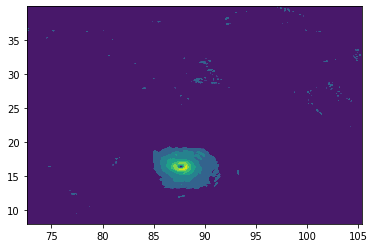

In [53]:
plt.contourf(longitude, latitude, thresh_wind[0])
plt.show()